In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('..')

In [2]:
df = pd.read_csv('data/immo_data_202208_v2.csv', sep=',', skip_blank_lines=True, dtype=str)
print(df.shape)

(22481, 134)


In [4]:
df

,Unnamed: 0.1,Unnamed: 0,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,...,features,description_detailed,Floor space:,Number of floors:,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned
0,0,0,Biberstein,100 m²,NaN,NaN,On request,"5023 Biberstein, AG","3.5 rooms, 100 m²«Luxuriöse Attika-Wohnung mit...",DescriptionLuxuriöse Attika-Wohnung direkt an ...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
1,1,1,Biberstein,156 m²,222 m²,242 m²,On request,"Buhldenstrasse 8d5023 Biberstein, AG","4.5 rooms, 156 m²«Stilvolle Liegenschaft - ruh...",DescriptionStilvolle Liegenschaft an ruhiger L...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
2,2,2,NaN,NaN,NaN,NaN,NaN,"5022 Rombach, AG","2.5 rooms, 93 m²«Moderne, lichtdurchflutete At...","detail_responsive#description_title2,5 Zimmerw...",...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN
3,3,3,Biberstein,154 m²,370 m²,257 m²,On request,"Buhaldenstrasse 8A5023 Biberstein, AG","4.5 rooms, 154 m²«AgentSelly - Luxuriöses Eckh...",DescriptionDieses äusserst grosszügige Minergi...,...,NaN,NaN,NaN,NaN,NaN,5023.0,NaN,NaN,NaN,NaN
4,4,4,Küttigen,142 m²,NaN,NaN,On request,"5022 Rombach, AG","4.5 rooms, 142 m²«MIT GARTENSITZPLATZ UND VIEL...",DescriptionAus ehemals zwei Wohnungen wurde ei...,...,NaN,NaN,NaN,NaN,NaN,5022.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22476,22476,29298,Buchs SG,NaN,NaN,NaN,NaN,"Altendorferstrasse 53, 9470 Buchs SG",NaN,"Description\n""Hausteil mit verschieden Nutzung...",...,Pets allowed\tCable TV\tChild-friendly\tParkin...,"Description\n""Hausteil mit verschieden Nutzung...",NaN,NaN,496 m3,9470.0,NaN,NaN,NaN,102.0
22477,22477,29300,Wil,NaN,NaN,NaN,NaN,"Fürstenlandstrasse 69, 9500 Wil",NaN,"Description\n""J'ADORE - Exklusives Wohnen in W...",...,Balcony / Terrace\tWashing machine\tView\tWhee...,"Description\n""J'ADORE - Exklusives Wohnen in W...",NaN,3.0,NaN,9500.0,NaN,NaN,NaN,180.0
22478,22478,29301,Wil SG,NaN,NaN,NaN,NaN,9500 Wil SG,NaN,"Description\n""Einmalige Gelegenheit an sehr gu...",...,Balcony / Terrace\tChild-friendly\tParking space,"Description\n""Einmalige Gelegenheit an sehr gu...",NaN,3.0,706 m3,9500.0,NaN,NaN,NaN,167.0
22479,22479,29302,Matzingen,NaN,NaN,NaN,NaN,"Haldenstrasse 30, 9548 Matzingen",NaN,"Description\n""LA VIE - Exklusives Wohnen in Ma...",...,Balcony / Terrace\tView\tWheelchair access\tQu...,"Description\n""LA VIE - Exklusives Wohnen in Ma...",NaN,NaN,NaN,9548.0,NaN,NaN,NaN,175.0


In [ ]:
df.tail()

In [ ]:
count_column = df.describe()[0:1]

count_column = count_column.transpose()
# order ascending
count_column = count_column.sort_values(by='count', axis=0)
# add procentual missing values
count_column['missing [%]'] = 100 - (count_column['count'] / df.shape[0] * 100)
count_column['missing absolute'] =  df.shape[0] - count_column['count']
count_column

In [ ]:
# find datapoint with most missing values
df[df.isnull().sum(axis=1) == df.isnull().sum(axis=1).max()]

In [94]:
# count price on request
amount_price_on_request = df[df['price'] == 'Price on request']
amount_price_on_request

,Unnamed: 0.1,Unnamed: 0,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,...,features,description_detailed,Floor space:,Number of floors:,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned


In [95]:
# count unique values in column price
prices = df['price'].value_counts()
#filter where price does not contain 'CHF'
prices = prices[prices.index.str.contains('CHF') == False]
prices

price
EUR 495,000.—      2
EUR1,130,000.–     1
EUR1,200,000.–     1
EUR1,180,000.–     1
EUR1,340,000.–     1
EUR 1,639,000.—    1
EUR1,645,000.–     1
EUR1,880,000.–     1
EUR2,130,000.–     1
EUR 780,000.—      1
EUR 190,000.—      1
EUR200,000.–       1
EUR 635,000.—      1
EUR5,500,000.–     1
EUR 650,000.—      1
EUR10,000,000.–    1
Name: count, dtype: int64

In [96]:
import folium
from folium.plugins import HeatMap

# Example data: list of tuples with (latitude, longitude)
locations = df[['lat', 'lon']].dropna().values

# Create a map centered around the first location
mymap = folium.Map(location=(46.95377140068709, 8.181809096197288), zoom_start=8)

# Create a HeatMap layer
HeatMap(locations, radius=7, blur=5).add_to(mymap)


# Save the map as an HTML file or display it directly in Jupyter
mymap.save("heatmap.html")

# If you're using Jupyter, display the map directly
mymap

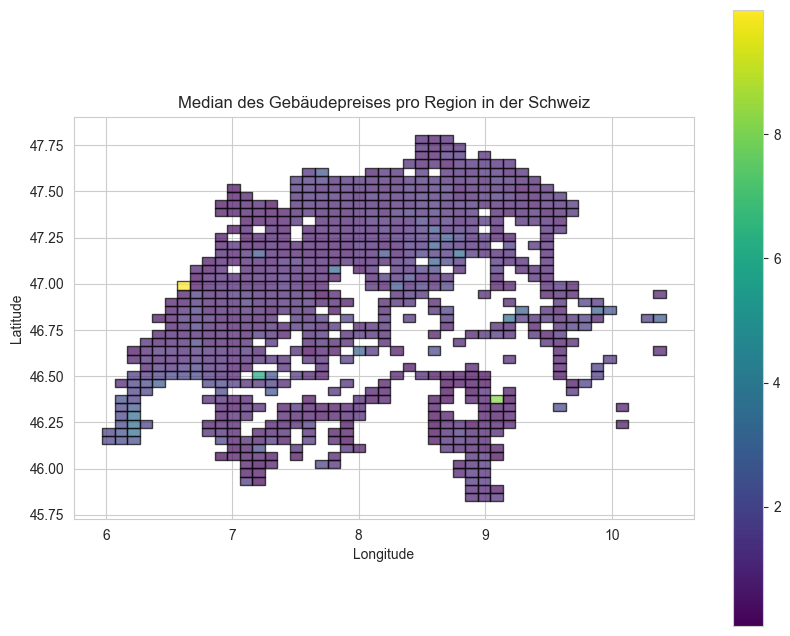

In [97]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import box


df_temp = df[['lat', 'lon', 'price_cleaned']]
df_temp = df_temp.dropna()
#convert to float
df_temp['lat'] = df_temp['lat'].astype(float)
df_temp['lon'] = df_temp['lon'].astype(float)
df_temp['price_cleaned'] = df_temp['price_cleaned'].astype(float)/1000000



# Konvertiere DataFrame in GeoDataFrame
gdf = gpd.GeoDataFrame(
    df_temp, geometry=gpd.points_from_xy(df_temp.lon, df_temp.lat), crs="EPSG:4326"
)

# Bounding Box der Schweiz bestimmen
minx, miny, maxx, maxy = gdf.total_bounds

# Anzahl der Quadrate
n_cells = 2000

# Bestimme die Breite und Höhe der Zellen
cell_size_x = (maxx - minx) / np.sqrt(n_cells)
cell_size_y = (maxy - miny) / np.sqrt(n_cells)

# Erstelle das Gitter (Grid)
grid = []
x = minx
while x < maxx:
    y = miny
    while y < maxy:
        grid.append(box(x, y, x + cell_size_x, y + cell_size_y))
        y += cell_size_y
    x += cell_size_x

grid_gdf = gpd.GeoDataFrame(grid, columns=['geometry'], crs="EPSG:4326")

# Räume den Gebäudedaten den entsprechenden Zellen zu
joined = gpd.sjoin(gdf, grid_gdf, how='left', predicate='within')

# Berechne den Durchschnittspreis pro Gitterzelle
avg_prices = joined.groupby('index_right')['price_cleaned'].median()

# Füge die Durchschnittspreise zum Gitter GeoDataFrame hinzu
grid_gdf['avg_price'] = grid_gdf.index.map(avg_prices)

# Karte zeichnen
fig, ax = plt.subplots(figsize=(10, 8))
grid_gdf.plot(column='avg_price', ax=ax, legend=True, cmap='viridis', edgecolor='black', alpha=0.7)
plt.title('Median des Gebäudepreises pro Region in der Schweiz')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


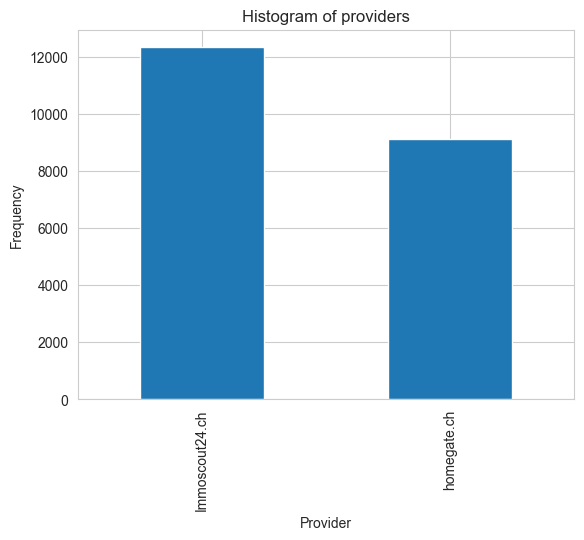

In [98]:
# Show distribution of the source and price
df['provider'].value_counts().plot.bar()
plt.xlabel('Provider')
plt.ylabel('Frequency')
plt.title('Histogram of providers')
plt.show()


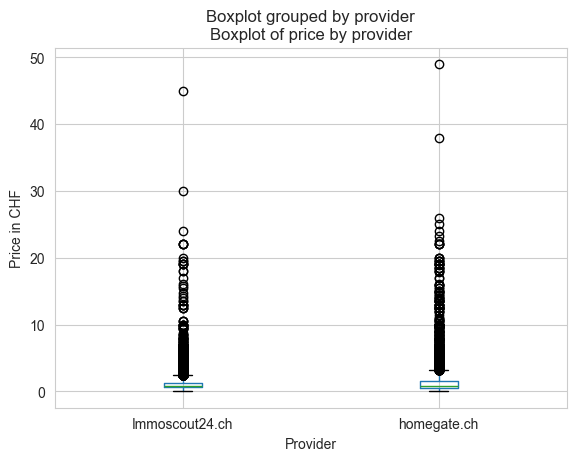

In [114]:
# Boxplot of price and provider
df_temp['price_cleaned'] = df['price_cleaned'].astype(float)/1000000
df_temp['provider'] = df['provider']
df_temp.boxplot(column='price_cleaned', by='provider', rot=0)
plt.xlabel('Provider')
plt.ylabel('Price in CHF')
plt.title('Boxplot of price by provider')
plt.show()


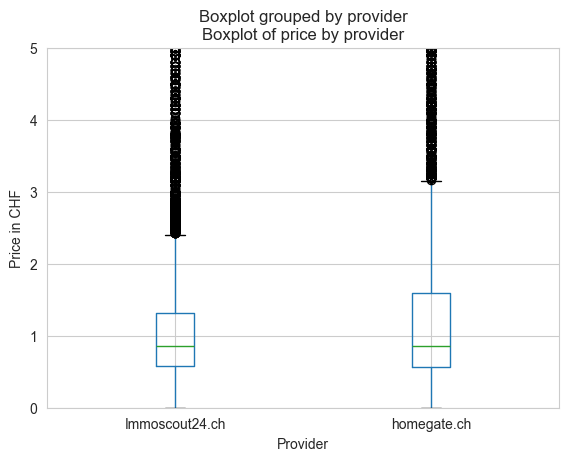

In [115]:
df_temp['price_cleaned'] = df['price_cleaned'].astype(float)/1000000
df_temp['provider'] = df['provider']

df_temp.boxplot(column='price_cleaned', by='provider', rot=0)
plt.xlabel('Provider')
plt.ylabel('Price in CHF')
plt.title('Boxplot of price by provider')
plt.ylim(0, 5)
plt.show()

In [101]:
# remove price on request
df = df[df['price'] != 'Price on request']
df['price_cleaned'] = df['price_cleaned'].astype(float)

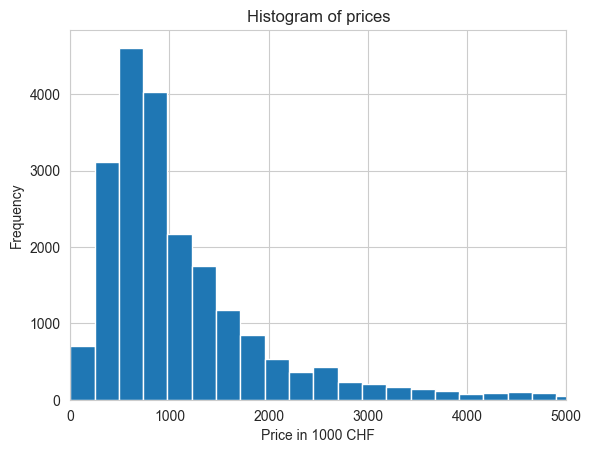

In [102]:
(df['price_cleaned']/1000).plot.hist(bins=200)
plt.xlabel('Price in 1000 CHF')
plt.ylabel('Frequency')
plt.title('Histogram of prices')
plt.xlim(0, 5000)
plt.show()

In [90]:
# show list of all columns ordered by price_cleaned asending
df = df.sort_values(by='price_cleaned', ascending=True)
df

,Unnamed: 0.1,Unnamed: 0,Municipality,Living space,Plot area,Floor space,Availability,location,description,detailed_description,...,features,description_detailed,Floor space:,Number of floors:,Volume:,plz,Number of toilets:,Gross yield:,Minimum floor space:,space_cleaned
10690,10690,10713,Etoy,NaN,NaN,NaN,On request,"1163 Etoy, VD",«a vendre une maison villageoise sur la Côte»C...,DescriptionA vendre une maison villageoise sit...,...,NaN,NaN,NaN,NaN,NaN,1163.0,NaN,NaN,NaN,NaN
3906,3906,3929,Veyrier,140 m²,NaN,NaN,31.12.2022,"1255 Veyrier, GE","7 rooms, 140 m²«Villa a vendre 7 pieces a Veyr...",DescriptionJolie maison familliale comprenant ...,...,NaN,NaN,NaN,NaN,NaN,1255.0,NaN,NaN,NaN,NaN
17882,17882,20516,Ovronnaz,NaN,NaN,NaN,NaN,"Ch de la Coppe, 1911 Ovronnaz","Chaleureux, douillets, élégants, les tout dern...","Description\n""Investissez en secondaire! Belle...",...,Balcony / Terrace\tCable TV\tFireplace\tWheelc...,"Description\n""Investissez en secondaire! Belle...",88 m2,NaN,NaN,1911.0,NaN,NaN,NaN,68.0
5021,5021,5044,Le Locle,45 m²,NaN,NaN,On request,"2400 Le Locle, NE","2 rooms, 45 m²«IDEAL POUR ETUDIANT !»CHF 745.—...","DescriptionIdéalement situé, cet appartement d...",...,NaN,NaN,NaN,NaN,NaN,2400.0,NaN,NaN,NaN,NaN
20194,20194,25560,Le Locle,NaN,NaN,NaN,NaN,2400 Le Locle,"Idéalement situé, cet appartement de 2 pièces ...","Description\n""IDEAL POUR ETUDIANT !""\nIdéaleme...",...,Wheelchair access\tElevator,"Description\n""IDEAL POUR ETUDIANT !""\nIdéaleme...",NaN,NaN,NaN,2400.0,NaN,NaN,NaN,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16848,16848,18758,Montreux,NaN,NaN,NaN,NaN,1820 Montreux,"Face au Lac, située à proximité du Centre-Vill...","Description\n""Somptueuse Maison de Maître avec...",...,Balcony / Terrace\tView\tParking space\tGarage...,"Description\n""Somptueuse Maison de Maître avec...",NaN,NaN,NaN,1820.0,NaN,NaN,NaN,782.0
11005,11005,11028,NaN,NaN,NaN,NaN,NaN,"1295 Tannay, VD","14 rooms, 1200 m²«Splendide propriété pied dan...",BeschreibungNous vous présentons cette superbe...,...,NaN,NaN,NaN,NaN,NaN,1295.0,NaN,NaN,NaN,NaN
13958,13958,14292,Buchillon,NaN,NaN,NaN,NaN,1164 Buchillon,"Située au bord du Lac Léman, entre Lausanne et...","Description\n""UNIQUE, villa ultra moderne pied...",...,Balcony / Terrace\tFireplace\tView\tWheelchair...,"Description\n""UNIQUE, villa ultra moderne pied...",NaN,2.0,NaN,1164.0,NaN,NaN,NaN,900.0
10657,10657,10680,Saint-Prex,NaN,5000 m²,NaN,On request,"1162 St-Prex, VD",10 rooms«Somptueuse propriété pieds dans l eau...,DescriptionCette propriété de maître ####pieds...,...,NaN,NaN,NaN,NaN,NaN,1162.0,NaN,NaN,NaN,NaN


In [91]:
import pandas as pd

def compare_columns_percentage(df):
    # Erstelle ein leeres Dictionary, um die Übereinstimmung zu speichern
    similarity_info = {}
    
    # Vergleiche jede Spalte mit jeder anderen Spalte
    for col1 in df.columns:
        for col2 in df.columns:
            if col1 != col2:  # Vermeide den Vergleich einer Spalte mit sich selbst
                # Vergleiche die Werte in jeder Zeile
                matching_rows = df[col1] == df[col2]
                matching_percentage = (matching_rows.sum() / len(df)) * 100  # Prozentuale Übereinstimmung
                
                # Speichere die Informationen nur, wenn es eine Übereinstimmung gibt
                if matching_percentage > 0:
                    similarity_info[(col1, col2)] = matching_percentage
    
    # Erstelle ein DataFrame aus dem Dictionary, um die Ergebnisse anzuzeigen
    similarity_df = pd.DataFrame.from_dict(similarity_info, orient='index', columns=['Percentage'])
    similarity_df.index = pd.MultiIndex.from_tuples(similarity_df.index, names=["Column 1", "Column 2"])
    
    # Sortiere die Ergebnisse nach der höchsten Übereinstimmung
    similarity_df = similarity_df.sort_values(by="Percentage", ascending=False)
    
    return similarity_df

# Beispiel-Aufruf mit deinem DataFrame (df)
similarity_df = compare_columns_percentage(df)
# Display the results
print(similarity_df)


KeyboardInterrupt: 

In [ ]:
similarity_df

In [ ]:
#df_droped_columns = df.drop(columns=['Unnamed: 0', 'plz', 'Living_area_unified', 'type', 'Availability', 'Municipality', 'Living space', 'Living_space_merged', 'address_s', 'location', 'space_cleaned', 'description', 'detailed_description', 'url', 'table', 'detail_responsive#municipality', 'detail_responsive#surface_living', 'detail_responsive#floor', 'detail_responsive#available_from', 'Minimum floor space:', 'Superficie utile', 'Gross return', 'Piano', 'Superficie del terreno', 'Surface utile', 'Gross yield:', 'Étage', 'Surface du terrain', 'Superficie abitabile', 'Comune', 'Disponibilità', 'Nutzfläche'])

In [ ]:
columns_to_drop = count_column[count_column['missing [%]'] > 50].index
columns_to_drop

In [ ]:
df_droped_columns = df.drop(columns=columns_to_drop)
df_droped_columns

# Analyse der Wohnungsdaten
## Flächenattribute

In [ ]:
columns_wohnung_attr = ['type'
                        , 'type_unified'
                        , 'rooms'
                        , 'Space extracted'
                        , 'Living_area_unified'
                        , 'Availability_merged'
                        , 'Availability'
                        , 'Living_space_merged'
                        , 'Living space'
                        , 'Floor'
                        , 'address_s'
                        , 'space'
                        , 'space_cleaned'
                        , 'Surface living:'
                        , 'No. of rooms:'
                        , 'Plot_area_unified'
                        , 'Year built:'
                        , 'Floor space'
                        , 'Floor_space_merged'
                        , 'Land area:'
                        , 'Plot area'
                        , 'Plot_area_merged'
                        , 'Floor_unified'
                        , 'Floor_merged'
                        , 'detail_responsive#floor'
                        , 'Room height:'
                        , 'detail_responsive#surface_living'
                        , 'detail_responsive#municipality'
                        , 'detail_responsive#available_from'
                        , 'Number of apartments:'
                        , 'Volume:'
                        , 'Last refurbishment:'
                        , 'Number of floors:'
                        , 'Floor space:'
                        , 'Surface habitable'
                        , 'Stockwerk'
                        , 'Disponibilité'
                        , 'Number of toilets:'
                        , 'detail_responsive#surface_usable'
                        , 'Wohnfläche'
                        , 'detail_responsive#surface_property'
                        , 'Verfügbarkeit'
                        , 'Superficie del terreno'
                        , 'Surface utile'
                        , 'Étage'
                        , 'Surface du terrain'
                        , 'Superficie abitabile'
                        , 'Disponibilità'
                        , 'Nutzfläche'
                        , 'Grundstücksfläche'
                        , 'Minimum floor space:'
                        , 'Superficie utile'
                        , 'Piano'
                        ]
df_wohung_flächenattr = df[columns_wohnung_attr]
df_wohung_flächenattr

In [ ]:
# count nan values per column
nans_wohnung = df_wohung_flächenattr.isna().sum()
nans_wohnung

In [ ]:
columns_duplicated_space_attr = [
                        'Space extracted'
                        , 'Living_area_unified'
                        , 'Living_space_merged'
                        , 'Living space'
                        , 'space'
                        , 'space_cleaned'
                        , 'Surface living:'
                        , 'Plot_area_unified'
                        , 'Floor space'
                        , 'Floor_space_merged'
                        , 'Land area:'
                        , 'Plot area'
                        , 'Plot_area_merged'
                        , 'detail_responsive#surface_living'
                        , 'Volume:'
                        , 'Floor space:'
                        , 'Surface habitable'
                        , 'detail_responsive#surface_usable'
                        , 'Wohnfläche'
                        , 'detail_responsive#surface_property'
                        , 'Superficie del terreno'
                        , 'Surface utile'
                        , 'Surface du terrain'
                        , 'Superficie abitabile'
                        , 'Nutzfläche'
                        , 'Grundstücksfläche'
                        , 'Minimum floor space:'
                        , 'Superficie utile'
]
df_wohung_flächenattr = df[columns_duplicated_space_attr]
df_wohung_flächenattr

In [ ]:
nans_wohnung = df_wohung_flächenattr.isna().sum()
nans_wohnung

In [ ]:
from src.dataPipeline import DataPipeline as dp
from sklearn.impute import SimpleImputer

dp = dp()
dp.readCsv('data/immo_data_202208_v2.csv')
dp.dropColumns([
    'Living_area_unified'
    ,'Living_space_merged'
    ,'Living space'
    ,'space'
    ,'space_cleaned'
    ,'Surface living:'
    ,'Wohnfläche'
    ,'Superficie abitabile'
])
dp.imputeMissingValues(imputer=SimpleImputer(strategy='most_frequent'))
dp.getData()

In [ ]:
for column in df.columns:
    print(column, df[column][0])


Stockwerk

In [ ]:
# drop rows where every value is missing

temp = df[['Floor_unified', 'Floor_merged', 'Étage', 'Piano', 'Stockwerk', 'detail_responsive#floor', 'Floor']]
temp.dropna(how='all').isna().sum()


In [ ]:
temp = df[['Floor_unified', 'Floor_merged', 'Étage', 'Piano', 'Stockwerk', 'detail_responsive#floor', 'Floor']]
temp['Floor'] = temp[['Floor', 'detail_responsive#floor', 'Floor_merged']].bfill(axis=1)['Floor']
temp.isna().sum()

Wohnfläche

In [ ]:
temp = df[['Living space', 'Wohnfläche', 'detail_responsive#surface_living', 'Surface habitable', 'Superficie abitabile', 'Living_space_merged', 'Space extracted', 'Living_area_unified', 'space', 'Surface living:', 'space_cleaned']]
temp.dropna(how='all').isna().sum()

In [ ]:
temp = df[['Living space', 'Wohnfläche', 'detail_responsive#surface_living', 'Surface habitable', 'Superficie abitabile', 'Living_space_merged', 'Space extracted', 'Living_area_unified', 'space', 'Surface living:', 'space_cleaned']]
temp = temp.dropna(how='all')
temp

In [ ]:
temp['Space extracted'] = temp[['Space extracted', 'detail_responsive#surface_living']].bfill(axis=1)['Space extracted']
temp.isna().sum()

Grundstücksfläche

In [ ]:
temp = df[['Plot area', 'Grundstücksfläche', 'detail_responsive#surface_property', 'Surface du terrain', 'Superficie del terreno', 'Plot_area_merged', 'Plot_area_unified', 'Land area:']]
temp.dropna(how='all').isna().sum()

In [ ]:
temp = df[['Plot_area_unified','Plot area', 'Grundstücksfläche', 'detail_responsive#surface_property', 'Surface du terrain', 'Superficie del terreno', 'Plot_area_merged', 'Land area:']]
temp = temp.dropna(how='all')
temp

In [ ]:
temp['Plot_area_unified'] = temp[['Plot_area_unified', 'detail_responsive#surface_property', 'Plot_area_merged']].bfill(axis=1)['Plot_area_unified']
temp.isna().sum()

Nutzfläche

In [ ]:
temp = df[['Nutzfläche', 'detail_responsive#surface_usable', 'Surface utile', 'Superficie utile']]
temp.dropna(how='all').isna().sum()

In [ ]:
temp = df[['Nutzfläche', 'detail_responsive#surface_usable', 'Surface utile', 'Superficie utile']]
temp = temp.dropna(how='all')
temp

In [ ]:
temp['detail_responsive#surface_usable'] = temp[['detail_responsive#surface_usable', 'Nutzfläche', 'Surface utile', 'Superficie utile']].bfill(axis=1)['detail_responsive#surface_usable']
temp.isna().sum()

Stockwerksfläche

In [ ]:
temp = df[['Floor space', 'Floor_space_merged']]
temp.dropna(how='all').isna().sum()

Floor_space_merged bereits vorhanden

Number of rooms

In [ ]:
temp = df[['No. of rooms:', 'rooms']]

In [ ]:
temp['No. of rooms:'] = temp[['No. of rooms:', 'rooms']].bfill(axis=1)['No. of rooms:']
temp.isna().sum()

Availability

In [ ]:
temp = df[['Availability', 'detail_responsive#available_from', 'Disponibilité', 'Disponibilità','Availability_merged']]
temp.dropna(how='all').isna().sum()

In [ ]:
temp = df[['Availability', 'detail_responsive#available_from', 'Disponibilité', 'Disponibilità','Availability_merged']]
temp = temp.dropna(how='all')
temp

In [ ]:
temp = df.drop(columns=[
'Unnamed: 0.1'
,'Unnamed: 0'
,'Living space'
,'Plot area'
,'Floor space'
,'location'
,'description'
,'detailed_description'
,'url'
,'table'
,'detail_responsive#surface_living'
,'detail_responsive#floor'
,'Wohnfläche'
,'Stockwerk'
,'Nutzfläche'
,'Grundstücksfläche'
,'detail_responsive#surface_property'
,'Surface habitable'
,'Surface du terrain'
,'Surface utile'
,'Étage'
,'Superficie abitabile'
,'Gross return'
,'Piano'
,'Superficie del terreno'
,'Superficie utile'
,'Floor_merged'
,'Living_space_merged'
,'Plot_area_merged'
,'location_parsed'
,'title'
,'details'
,'address'
,'link'
,'details_structured'
,'Floor_unified'
,'Living_area_unified'
,'provider'
,'space'
,'address_s'
,'rooms'
,'Surface living:'
,'Land area:'
,'Room height:'
,'features'
,'description_detailed'
,'Floor space:'
,'Volume:'
,'Number of toilets:'
,'Gross yield:'
,'Minimum floor space:'
,'space_cleaned'
])
temp

### Test Datapipeline

In [ ]:
columns_to_drop_all=[
'Unnamed: 0.1'
,'Unnamed: 0'
,'Municipality'
,'Living space'
,'Plot area'
,'Floor space'
,'location'
,'description'
,'detailed_description'
,'url'
,'table'
,'detail_responsive#municipality'
,'detail_responsive#surface_living'
,'detail_responsive#floor'
,'detail_responsive#available_from'
,'Gemeinde'
,'Wohnfläche'
,'Stockwerk'
,'Nutzfläche'
,'Verfügbarkeit'
,'Grundstücksfläche'
,'detail_responsive#surface_property'
,'Commune'
,'Surface habitable'
,'Surface du terrain'
,'Surface utile'
,'Disponibilité'
,'Étage'
,'Comune'
,'Superficie abitabile'
,'Disponibilità'
,'Gross return'
,'Piano'
,'Superficie del terreno'
,'Superficie utile'
,'Municipality_merged'
,'Floor_merged'
,'Living_space_merged'
,'Plot_area_merged'
,'Availability_merged'
,'location_parsed'
,'title'
,'price'
,'details'
,'address'
,'link'
,'details_structured'
,'lat'
,'lon'
,'index'
,'Latitude'
,'Locality'
,'Longitude'
,'Zip'
,'rooms'
,'type_unified'
,'Floor_unified'
,'Living_area_unified'
,'provider'
,'space'
,'price_s'
,'address_s'
,'Surface living:'
,'Land area:'
,'Room height:'
,'features'
,'description_detailed'
,'Floor space:'
,'Volume:'
,'plz'
,'Number of toilets:'
,'Gross yield:'
,'Minimum floor space:'
,'space_cleaned'
]

In [ ]:
from src.dataPipeline import DataPipeline as DataPipeline
from sklearn.impute import KNNImputer

dp = DataPipeline()
dp.readCsv('data/immo_data_202208_v2.csv')
dp.mergeColumns()
dp.dropColumns(columns=columns_to_drop_all)
dp.cleanData()
dp.encodeCategoricalFeatures()
dp.imputeMissingValues(imputer=KNNImputer(n_neighbors=5))
df_clean = dp.getData()

In [ ]:
df_clean

In [ ]:
# Plot scatterplot of price_cleaned and space extracted
plt.scatter(df_clean['price_cleaned']/10000, df_clean['Space extracted'])
plt.xlabel('Price in CHF [10`000]')
plt.ylabel('Space in m²')
plt.title('Scatterplot of price and space')
plt.show()

Make random forest model to predict price_cleaned

In [ ]:
# Make random forest model to predict price_cleaned
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# use mape as metric
from sklearn.metrics import mean_absolute_percentage_error

X = df_clean.drop(columns=['price_cleaned'])
y = df_clean['price_cleaned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mape = mean_absolute_percentage_error(y_test, y_pred)
mape

In [ ]:
# show feature importance with names
feature_importance = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
feature_importance_df

In [ ]:
from src.dataPipeline import DataPipeline as DataPipeline
from sklearn.impute import KNNImputer

dp = DataPipeline()
knnImputer = KNNImputer(n_neighbors=10)
df_cleaned = dp.runPipeline(imputer=knnImputer)
df_cleaned

In [ ]:
# check for duplicates and print them
duplicates = df_cleaned.duplicated()
duplicates = df_cleaned[duplicates]
duplicates

In [ ]:
# Plot correlation matrix of top 10 features
import seaborn as sns
corr = df_cleaned[['price_cleaned', 'detail_responsive#surface_usable'
,'Floor_space_merged'
,'Number of apartments:'
,'Floor'
,'Last refurbishment:'
,'gde_new_homes_per_1000'
,'Year built:'
,'gde_politics_bdp'
,'Number of floors:'
,'gde_foreigners_percentage'
]].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr)
plt.show()

In [ ]:
corr = df_cleaned[['price_cleaned', 'gde_politics_svp'
,'gde_area_agriculture_percentage'
,'Space extracted'
,'gde_empty_apartments'
,'plz_parsed'
,'Plot_area_unified'
,'gde_pop_per_km2'
,'No. of rooms:'
,'gde_population'
,'gde_workers_sector2'
]].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr)
plt.show()